In [39]:
from pymongo import MongoClient
from pandas import DataFrame
from statistics import mean, stdev
import matplotlib as mpl
import matplotlib.ticker as mtick
from pydash import omit

In [40]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width=422.52348, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

# Experiment 1

In [41]:
def get_jaccard_match_types_table_extractor():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'parser': 'tableExtractor', 
                    'status': 'success', 
                    'fileMetrics_incomplete': False
                }
            }, {
                '$group': {
                    '_id': None, 
                    'Perfect match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 1
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'Partial match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$and': [
                                            {
                                                '$lt': [
                                                    '$$table.jaccard', 1
                                                ]
                                            }, {
                                                '$gt': [
                                                    '$$table.jaccard', 0
                                                ]
                                            }
                                        ]
                                    }
                                }
                            }
                        }
                    },
                    'No match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 0
                                        ]
                                    }
                                }
                            }
                        }
                    },  
                    'Eager match': {
                        '$sum': '$tableMetrics_eager'
                    }
                }
            }, {
                '$project': {
                    '_id': False
                }
            }
        ])

In [42]:
def get_jaccard_match_types_naive():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'parser': 'rfc4180', 
                    'status': 'success', 
                    'fileMetrics_incomplete': False
                }
            }, {
                '$group': {
                    '_id': None, 
                    'Perfect match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 1
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'Partial match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$and': [
                                            {
                                                '$lt': [
                                                    '$$table.jaccard', 1
                                                ]
                                            }, {
                                                '$gt': [
                                                    '$$table.jaccard', 0
                                                ]
                                            }
                                        ]
                                    }
                                }
                            }
                        }
                    },
                    'No match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 0
                                        ]
                                    }
                                }
                            }
                        }
                    },  
                    'Eager match': {
                        '$sum': '$tableMetrics_eager'
                    }
                }
            }, {
                '$project': {
                    '_id': False
                }
            }
        ])

In [43]:
def get_jaccard_match_types_pytheas():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['pytheas'].aggregate([
            {
                '$match': {
                    'status': 'success', 
                    'incomplete': False
                }
            }, {
                '$group': {
                    '_id': None, 
                    'Perfect match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$metrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 1
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'Partial match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$metrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$and': [
                                            {
                                                '$lt': [
                                                    '$$table.jaccard', 1
                                                ]
                                            }, {
                                                '$gt': [
                                                    '$$table.jaccard', 0
                                                ]
                                            }
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'No match': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$metrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.jaccard', 0
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'Eager match': {
                        '$sum': '$metrics_falsePositives'
                    }
                }
            }, {
                '$project': {
                    '_id': False
                }
            }
        ])

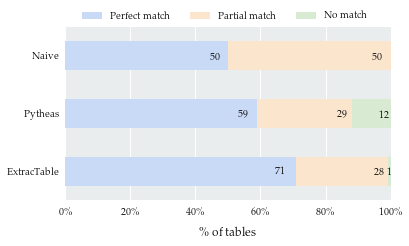

In [44]:
df = DataFrame(
    [
        omit(next(get_jaccard_match_types_table_extractor()), 'Eager match'),
        omit(next(get_jaccard_match_types_pytheas()), 'Eager match'),
        omit(next(get_jaccard_match_types_naive()), 'Eager match')   
    ],
    index=['ExtracTable', 'Pytheas', 'Naive']
).apply(lambda x: x*100/sum(x), axis=1)
ax = df.plot(
    kind='barh',
    stacked=True
)

ax.set(
    xlim=(0, 100),
    xlabel='\% of tables'
)

for i_p, p in enumerate(ax.patches):
    if not p.get_width():
        continue
    ax.annotate(
        round(p.get_width()), 
        (p.get_x() + p.get_width() * 0.95, p.get_y() + p.get_height() / 2) if p.get_width() >= 4 else (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), 
        verticalalignment='center_baseline', 
        horizontalalignment='right' if p.get_width() >= 4 else 'center', 
        fontsize=10
    )
    
ax.legend(loc='lower center', bbox_to_anchor=(0, 0.98, 0.98, 0), ncol=3)
ax.get_xaxis().set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.tight_layout()
ax.get_figure().savefig('table-match-types')

In [45]:
def get_eager_got_ratio_table_extractor():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'fileMetrics_incomplete': False, 
                    'status': 'success', 
                    'parser': 'tableExtractor'
                }
            }, {
                '$group': {
                    '_id': None, 
                    'got': {
                        '$sum': '$tableMetrics_got'
                    }, 
                    'eager': {
                        '$sum': '$tableMetrics_eager'
                    }
                }
            }
        ])

In [46]:
def get_eager_got_ratio_pytheas():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['pytheas'].aggregate([
    {
        '$match': {
            'incomplete': False, 
            'status': 'success'
        }
    }, {
        '$group': {
            '_id': None, 
            'got': {
                '$sum': '$metrics_got'
            }, 
            'eager': {
                '$sum': '$metrics_falsePositives'
            }
        }
    }
])

In [47]:
eager_got_ratio_pytheas = next(get_eager_got_ratio_pytheas())
print('pytheas', eager_got_ratio_pytheas['eager'] / eager_got_ratio_pytheas['got'])
eager_got_ratio_table_extractor = next(get_eager_got_ratio_table_extractor())
print('extractable', eager_got_ratio_table_extractor['eager'] / eager_got_ratio_table_extractor['got'])

pytheas 0.06150061500615006
extractable 0.13010657193605685


In [48]:
eager_got_ratio_pytheas['eager']

50

# Experiment 2

Classify types using table F1 score https://dl.acm.org/doi/pdf/10.1145/1815330.1815339

In [49]:
def get_f1_match_types():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'parser': 'tableExtractor', 
                    'status': 'success', 
                    'fileMetrics_incomplete': False
                }
            }, {
                '$group': {
                    '_id': None, 
                    'correct': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.matchType', 'correct'
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'missed': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.matchType', 'missed'
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'partial': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.matchType', 'partial'
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'underSegmented': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.matchType', 'underSegmented'
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'overSegmented': {
                        '$sum': {
                            '$size': {
                                '$filter': {
                                    'input': '$tableMetrics_tables', 
                                    'as': 'table', 
                                    'cond': {
                                        '$eq': [
                                            '$$table.matchType', 'overSegmented'
                                        ]
                                    }
                                }
                            }
                        }
                    }, 
                    'falsePositive': {
                        '$sum': '$tableMetrics_falsePositive'
                    }
                }
            }, {
                '$project': {
                    '_id': False
                }
            }
        ])

In [50]:
DataFrame([
    *get_f1_match_types()
]).transpose()

,0
correct,764
missed,7
partial,177
underSegmented,41
overSegmented,86
falsePositive,293


# Experiment 3

Number of tables with Jaccard higher than X

In [51]:
def get_table_jaccards_for_table_extractor():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'parser': 'tableExtractor', 
                    'status': 'success', 
                    'fileMetrics_incomplete': False
                }
            }, {
                '$unwind': {
                    'path': '$tableMetrics_tables'
                }
            }, {
                '$project': {
                    'jaccard': '$tableMetrics_tables.jaccard', 
                    '_id': False
                }
            }
        ])

In [52]:
def get_table_jaccards_for_pytheas():
    with MongoClient() as mongo:
        db = mongo['master']
        return db['pytheas'].aggregate([
            {
                '$match': {
                    'status': 'success', 
                    'incomplete': False
                }
            }, {
                '$unwind': {
                    'path': '$metrics_tables'
                }
            }, {
                '$project': {
                    'jaccard': '$metrics_tables.jaccard', 
                    '_id': False
                }
            }
        ])

In [53]:
def get_table_jaccards_for_naive():
     with MongoClient() as mongo:
        db = mongo['master']
        return db['metrics'].aggregate([
            {
                '$match': {
                    'fileMetrics_incomplete': False, 
                    'parser': 'rfc4180'
                }
            }, {
                '$unwind': {
                    'path': '$tableMetrics_tables'
                }
            }, {
                '$project': {
                    '_id': False, 
                    'jaccard': {
                        '$divide': [
                            '$tableMetrics_tables.rowCount', '$lineMetrics_lineCount'
                        ]
                    }
                }
            }
        ])

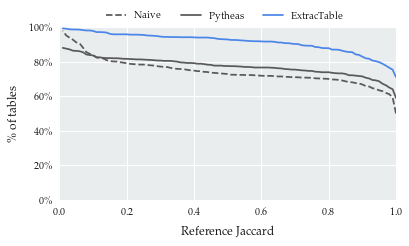

In [54]:
table_extractor = [*get_table_jaccards_for_table_extractor()]
pytheas = [*get_table_jaccards_for_pytheas()]
naive = [*get_table_jaccards_for_naive()]
df = DataFrame([
    {
        'threshold': threshold,
        'Naive': mean(jaccard['jaccard'] >= threshold for jaccard in naive),
        'Pytheas': mean(jaccard['jaccard'] >= threshold for jaccard in pytheas),
        'ExtracTable': mean(jaccard['jaccard'] >= threshold for jaccard in table_extractor)
    }
    for threshold in (round(v * 0.01, 2) for v in range(100, 0, -1))
])

ax = df.plot(
    kind='line',
    x='threshold', 
    color=['#595959', '#595959', '#4A86E8'],
    style=['--', '', '']
)

ax.set(
    xlim=(0, 1.0),
    ylim=(0, 1.0),
    xlabel='Reference Jaccard',
    ylabel='\% of tables'
)

ax.get_yaxis().set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax.legend(loc='lower center', bbox_to_anchor=(0, 0.98, 0.98, 0), ncol=3)
plt.tight_layout()
ax.get_figure().savefig('jaccard-coverage')

In [55]:
df.head(11)

,threshold,Naive,Pytheas,ExtracTable
0,1.00,0.500000,0.590164,0.710698
1,0.99,0.592715,0.640437,0.753488
2,0.98,0.611755,0.650273,0.764651
3,0.97,0.619205,0.663388,0.776744
4,0.96,0.629139,0.672131,0.787907
5,0.95,0.634106,0.686339,0.797209
6,0.94,0.642384,0.691803,0.802791
7,0.93,0.646523,0.693989,0.806512
8,0.92,0.656457,0.702732,0.816744
9,0.91,0.658940,0.707104,0.819535


# Experiment 4

mAP (mean Average Precision) of Jaccard over IoU 0.5, 0.55, ..., 0.95 https://cocodataset.org/#detection-eval

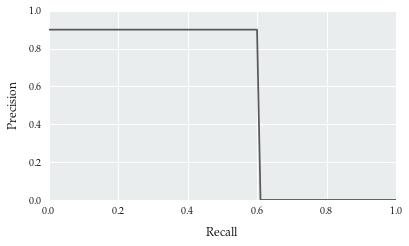

In [56]:
recall = 0.6
precision = 0.9
df = DataFrame([
    {
        'recall': min_recall, 
        'precision': precision if recall >= min_recall else 0
    }
    for min_recall in [v / 100 for v in range(0, 101, 1)]
])

ax = df.plot(
    kind='line',
    x='recall',
    y='precision',
    legend=False,
    ylim=(0, 1),
    xlim=(0, 1),
    color=['#595959'],
    ylabel='Precision',
    xlabel='Recall'
)

plt.tight_layout()
ax.get_figure().savefig('precision-recall-curve')

In [57]:
min_recalls = [v / 100 for v in range(0, 101, 1)]
def get_ap(jaccards, threshold):
    tp = sum(jaccard >= threshold for jaccard in jaccards)
    fp = sum(0 < jaccard < threshold for jaccard in jaccards)
    fn = sum(not jaccard for jaccard in jaccards)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return mean(precision if recall >= min_recall else 0 for min_recall in min_recalls)

In [58]:
jaccards = [jaccard['jaccard'] for jaccard in get_table_jaccards_for_table_extractor()]
thresholds = [v / 100 for v in range(50, 100, 5)]
aps = [get_ap(jaccards, threshold) for threshold in thresholds]
print('mAP tableExtractor', mean(aps))

mAP tableExtractor 0.8805206363332962


In [59]:
jaccards = [jaccard['jaccard'] for jaccard in get_table_jaccards_for_naive()]
thresholds = [v / 100 for v in range(50, 100, 5)]
aps = [get_ap(jaccards, threshold) for threshold in thresholds]
print('mAP allTable', mean(aps))

mAP allTable 0.6990066225165563


In [60]:
jaccards = [jaccard['jaccard'] for jaccard in get_table_jaccards_for_pytheas()]
thresholds = [v / 100 for v in range(50, 100, 5)]
aps = [get_ap(jaccards, threshold) for threshold in thresholds]
print('mAP Pytheas', mean(aps))

mAP Pytheas 0.7252954327690834


# Showcase 1

Missing tables:

- 5fa1a9690c27781bd8126564 (line 441-444)
    - short table (2 data rows), inconsistent patterns
- 600f259ff173f2db071dfcb4 (line 0-3)
    - not a real data table
- 5fa1c66bb543bb088d4cdd3a (line 0-20)
    - matrix with too many empty values

# Showcase 2

Checking if there is a pattern for over-segmented tables.

- Matrix
    - 5fa19c4a0c27781bd866ba7c
    
- significant change in patterns (borderline to multi-tables)
    - 5fa19e390c27781bd8046138
    - 5fa19e390c27781bd8046201
    - 5fa19e4a0c27781bd809cd3d
    - 5fa19e880c27781bd81fc897
- multiple pattern + empty fields
    - 5fa19e3e0c27781bd8061b11

# Showcase 3

Checking if there is a pattern for false positive tables

- false positive because of eager ASCII
    - 5fa197890c27781bd810e50c
- dictionary
    - 5fa1984e0c27781bd82f4bde
    - 5fa19b810c27781bd822efbc
    - 5fa19c310c27781bd85e2589
    - 5fa19c490c27781bd86690fd
    - 5fa19cbe0c27781bd88acfe2

# Showcase 4

Checking if there is a pattern for partial tables

- including text above/ below
    - 5fa197890c27781bd810e407
    - 5fa19c510c27781bd869186c
    - 5fa19d8f0c27781bd8ce282f
    
- partial header missing
    - 5fa19c490c27781bd86690fd (encoding errors)
    
- matrix:
    - 5fa19c4a0c27781bd866bac1